## First part Concerns exploring and cleaning data ##

In [79]:
import pandas as pd 
import re
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [80]:
allData = pd.read_csv("./train.csv")

In [81]:
df = pd.DataFrame(allData)

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df.iloc[1][3]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [84]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
#Data quality: replace null values
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Fare'].fillna(df['Fare'].mean(), inplace = True)
df['Embarked'].fillna('C', inplace = True)
df['Cabin'].fillna('Sofa', inplace = True)

In [86]:
#correcting decimal to integer age
#for idx, row in df.iterrows():
 #   if (row['Age'] < 1 and row['Age'] > 0):
 #       df.loc[idx, 'Age'] *= 100

In [87]:
#_addCol = df.assign(Title=lambda x: (re.search(',(.*)\.', str(x.Name)).group(0))

In [88]:
#splitting Name column in 2 columns based on a separating string
df[['Unknown','Name']] = df.Name.str.split(", ",expand=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unknown
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,Sofa,S,Braund
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,Sofa,S,Heikkinen
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,Sofa,S,Allen


In [89]:
for i in df.iterrows():
    if df.Name.empty:
        print(i)

In [90]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
df.drop(["Name", "PassengerId", "Cabin", "Ticket", 'Unknown'], axis = 1, inplace = True )

In [92]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## After familiarizing with data. A visualization might help understand a bit more by looking for trends, multicollinearity and outliers ##

In [93]:
#Survival rate per sex
women = df.loc[(df.Sex == 'female')]
survivedWomen = df.loc[(df.Sex == 'female') & (df.Survived == 1)]
survivalRateWomen = len(survivedWomen)/len(women)

men = df.loc[(df.Sex == 'male')]
survivedMen = df.loc[(df.Sex == 'male') & (df.Survived == 1)]
survivalRateMen = len(survivedMen)/len(men)

print("Survival rate for women: " + str(survivalRateWomen))
print("Survival rate for men: " + str(survivalRateMen))

Survival rate for women: 0.7420382165605095
Survival rate for men: 0.18890814558058924


In [94]:
#Survival rate per wealth
upperClass = df.loc[(df.Pclass == 1)]
middleClass = df.loc[(df.Pclass == 2)]
lowerClass = df.loc[(df.Pclass == 3)]

survialsUpperClass = upperClass.loc[(upperClass.Survived == 1)]
survialsMiddleClass = middleClass.loc[(middleClass.Survived == 1)]
survialsLowerClass = lowerClass.loc[(lowerClass.Survived == 1)]

print("Survival rate for upper class: " + str(len(survialsUpperClass)/len(upperClass)))
print("Survival rate for middle class: " + str(len(survialsMiddleClass)/len(middleClass)))
print("Survival rate for lower class: " + str(len(survialsLowerClass)/len(lowerClass)))

Survival rate for upper class: 0.6296296296296297
Survival rate for middle class: 0.47282608695652173
Survival rate for lower class: 0.24236252545824846


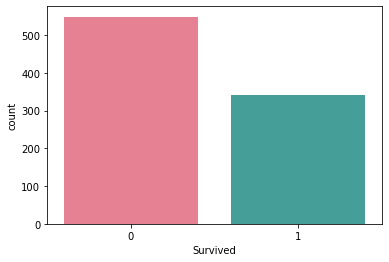

In [95]:
sns.countplot(x='Survived', data = df, palette = 'husl')

In [96]:
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887
1,1.950292,28.549778,0.473684,0.464912,48.395408


In [97]:
df.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.048118,0.416667,0.356481,84.154687
2,0.472826,29.866958,0.402174,0.380435,20.662183
3,0.242363,26.403259,0.615071,0.393075,13.675550


In [98]:
df.groupby(pd.cut(df["Age"], np.arange(0, 100, 10))).count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Age,,,,,,,,
"(0, 10]",64,64,64,64,64,64,64,64
"(10, 20]",115,115,115,115,115,115,115,115
"(20, 30]",407,407,407,407,407,407,407,407
"(30, 40]",155,155,155,155,155,155,155,155
"(40, 50]",86,86,86,86,86,86,86,86
"(50, 60]",42,42,42,42,42,42,42,42
"(60, 70]",17,17,17,17,17,17,17,17
"(70, 80]",5,5,5,5,5,5,5,5
"(80, 90]",0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Survival rate per Class')

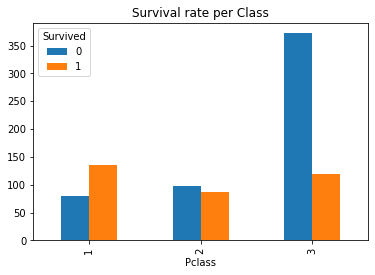

In [99]:
pd.crosstab(df.Pclass, df.Survived).plot(kind='bar')
plt.title("Survival rate per Class")

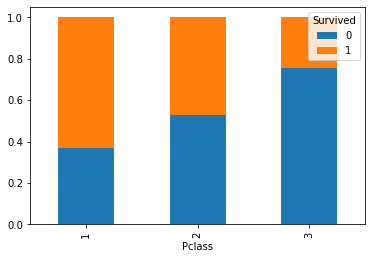

In [100]:
#Survival frequency per class
crosstabSurvival = pd.crosstab(df.Pclass, df.Survived)
crosstabSurvival.div(crosstabSurvival.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

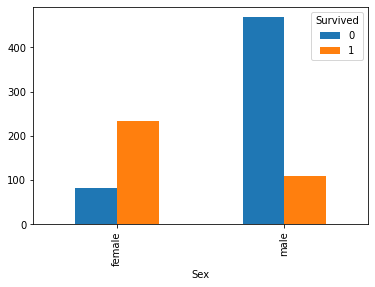

In [101]:
#Survival frequency per sex
crosstabSurvivalSex = pd.crosstab(df.Sex, df.Survived)
crosstabSurvivalSex.plot(kind = "bar")

Text(0.5, 1.0, 'Survived frequency by grouped Age')

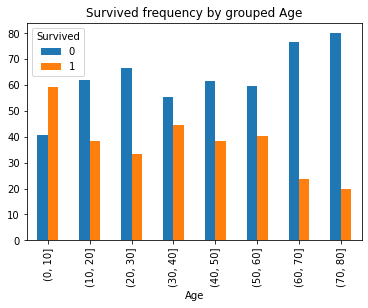

In [102]:
pd.crosstab(pd.cut(df["Age"], np.arange(0, 100, 10)), df.Survived).apply(lambda x: x/x.sum()*100, axis=1).plot(kind='bar')
plt.title("Survived frequency by grouped Age")

Text(0.5, 1.0, 'Histogram for ages')

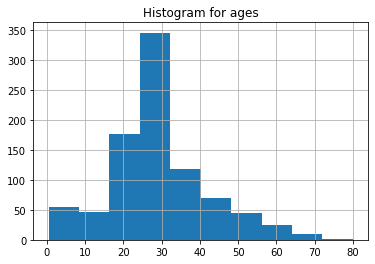

In [103]:
df.Age.hist()
plt.title("Histogram for ages")

Text(0.5, 1.0, 'Histogram of pricing')

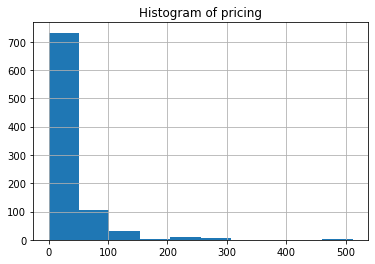

In [104]:
df.Fare.hist()
plt.title("Histogram of pricing")

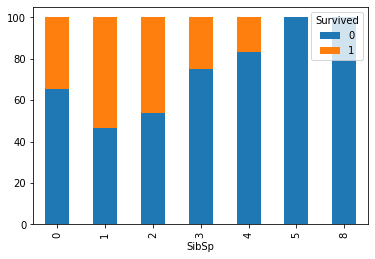

In [105]:
#Survival rate per number of siblings (and spouse) onboard
crosstabSurvivalSiblings = pd.crosstab(df.SibSp, df.Survived).apply(lambda x: x/x.sum()*100, axis=1).plot(kind = "bar", stacked = True)

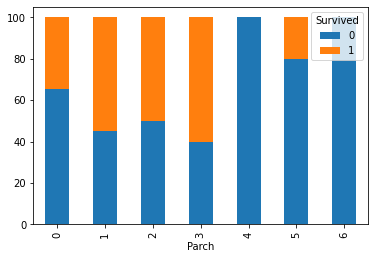

In [106]:
#Survival rate per number of children (and parents) onboard
crosstabSurvivalSiblings = pd.crosstab(df.Parch, df.Survived).apply(lambda x: x/x.sum()*100, axis=1).plot(kind = "bar", stacked = True)

### The above chart shows that having a lot of family members leads to more possibility of non-survival as maybe people had to wait/help each other. On the other hand we see  an above 60% non-survival for people traveling alone: let's find out their age and their class

Text(0.5, 1.0, 'Survived frequency by grouped Age for solo travelers')

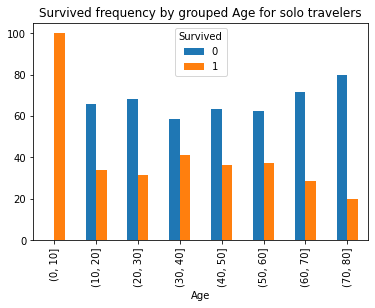

In [107]:
noFamily = df.loc[(df.Parch == 0)]
pd.crosstab(pd.cut(noFamily["Age"], np.arange(0, 100, 10)), noFamily.Survived).apply(lambda x: x/x.sum()*100, axis=1).plot(kind='bar')
plt.title("Survived frequency by grouped Age for solo travelers")

### This chart might mean that solo travelers felt the duty of helping others

In [108]:
#Creating Dummy Variables for categorical columns

categorical_vars = ['Sex', 'Embarked']
prepared_df = df
for var in categorical_vars:
    cat_list = pd.get_dummies(df[var], prefix=var)
    prepared_df=prepared_df.join(cat_list)

data_vars = prepared_df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categorical_vars]

data_final=prepared_df[to_keep]
data_final

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [109]:
data_final.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.190797,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.393150,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
data_final.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Evaluation starts here. 70% train and 30% test ##

In [111]:
#input: X and output (survival): y
X = data_final.iloc[:, 1:] # [rows, columns], or just data_final.drop(columns=['Survived'])
y = data_final.iloc[:, 0] # or just data_final.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [112]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict_KNN = model.predict(X_test)

In [113]:
print(accuracy_score(y_test, y_predict_KNN))
pd.crosstab(y_test, y_predict_KNN)

0.7425373134328358


col_0,0,1
Survived,,
0,145,29
1,40,54


### The above is the confusion matrix and we can see the model can be improved

In [114]:
model_randomForest = RandomForestClassifier()
model_randomForest.fit(X_train, y_train)
y_predict_randomForest = model_randomForest.predict(X_test)
print(accuracy_score(y_test, y_predict_randomForest))
pd.crosstab(y_test, y_predict_randomForest)

0.8059701492537313


col_0,0,1
Survived,,
0,148,26
1,26,68


## Reading test data and preparing it to match training data and finally apply model ##

In [127]:
test_data = pd.read_csv("./test.csv")

In [128]:
test_data['Age'].fillna(df['Age'].mean(), inplace = True)
test_data['Fare'].fillna(df['Fare'].mean(), inplace = True)
test_data['Embarked'].fillna('C', inplace = True)
test_data['Cabin'].fillna('Sofa', inplace = True)
test_data.drop(["Name", "Cabin", "Ticket"], axis = 1, inplace = True )

categorical_vars = ['Sex', 'Embarked']
prepared_df = test_data
for var in categorical_vars:
    cat_list = pd.get_dummies(df[var], prefix=var)
    prepared_df=prepared_df.join(cat_list)

data_vars = prepared_df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categorical_vars]

data_final_test=prepared_df[to_keep]
data_final_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.500000,0,0,7.8292,0,1,0,0,1
1,893,3,47.000000,1,0,7.0000,1,0,1,0,0
2,894,2,62.000000,0,0,9.6875,1,0,0,0,1
3,895,3,27.000000,0,0,8.6625,1,0,0,0,1
4,896,3,22.000000,1,1,12.2875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,29.699118,0,0,8.0500,0,1,0,0,1
414,1306,1,39.000000,0,0,108.9000,0,1,0,0,1
415,1307,3,38.500000,0,0,7.2500,1,0,0,0,1
416,1308,3,29.699118,0,0,8.0500,1,0,0,0,1


In [ ]:
#y = train["Survived"]

#features = ["Sex", "Age", "Pclass", "Fare", "SibSp", "Parch"]
#X = pd.get_dummies(train[features])
#X_test = pd.get_dummies(test[features])
##X, y = make_classification(n_features=10)
#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model.fit(X, y)
#predictions = model.predict(X_test)

#output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
#output.to_csv('my_submission.csv', index=False)
#print("Your submission was successfully saved!")

In [129]:

features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]

X = data_final[features]
y = data_final['Survived']
X_test = data_final_test[features]

model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': data_final_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

print(precision_score(y_test, predictions))

In [117]:
allData.shape

(891, 13)